In [1]:
#pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
#!jupyter nbextension enable --py widgetsnbextension --user


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [5]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [13]:
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

In [14]:
from imblearn.over_sampling import SMOTE

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [177]:
df_train = pd.read_csv('/home/mikhail/Рабочий стол/DS_02/course_project/course_project_train.csv')
df_train

Home Ownership  Annual Income Years in current job  Tax Liens  \
0          Own Home       482087.0                  NaN        0.0   
1          Own Home      1025487.0            10+ years        0.0   
2     Home Mortgage       751412.0              8 years        0.0   
3          Own Home       805068.0              6 years        0.0   
4              Rent       776264.0              8 years        0.0   
...             ...            ...                  ...        ...   
7495           Rent       402192.0             < 1 year        0.0   
7496  Home Mortgage      1533984.0               1 year        0.0   
7497           Rent      1878910.0              6 years        0.0   
7498  Home Mortgage            NaN                  NaN        0.0   
7499           Rent            NaN              4 years        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                        11.0                     26.3             685960.0   
1                        15.0                     15.3            1181730.0   
2                        11.0                     35.0            1182434.0   
3                         8.0                     22.5             147400.0   
4                        13.0                     13.6             385836.0   
...                       ...                      ...                  ...   
7495                      3.0                      8.5             107866.0   
7496                     10.0                     26.5             686312.0   
7497                     12.0                     32.1            1778920.0   
7498                     21.0                     26.5            1141250.0   
7499                      8.0                      9.4             480832.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                           1.0                           NaN           1.0   
1                           0.0                           NaN           0.0   
2                           0.0                           NaN           0.0   
3                           1.0                           NaN           1.0   
4                           1.0                           NaN           0.0   
...                         ...                           ...           ...   
7495                        0.0                           NaN           0.0   
7496                        0.0                          43.0           0.0   
7497                        0.0                           NaN           0.0   
7498                        0.0                           NaN           0.0   
7499                        0.0                           NaN           0.0   

                 Purpose        Term  Current Loan Amount  \
0     debt consolidation  Short Term           99999999.0   
1     debt consolidation   Long Term             264968.0   
2     debt consolidation  Short Term           99999999.0   
3     debt consolidation  Short Term             121396.0   
4     debt consolidation  Short Term             125840.0   
...                  ...         ...                  ...   
7495               other  Short Term             129360.0   
7496  debt consolidation   Long Term             444048.0   
7497           buy a car  Short Term           99999999.0   
7498  debt consolidation  Short Term             615274.0   
7499  debt consolidation  Short Term              26928.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                    47386.0        7914.0         749.0               0  
1                   394972.0       18373.0         737.0               1  
2                   308389.0       13651.0         742.0               0  
3                    95855.0       11338.0         694.0               0  
4                    93309.0        7180.0         719.0               0  
...                      ...           ...           ...             ...  
7495    

In [178]:
def view_matrix_in(df_train):
    
    '''показывает пропуски по колонкам сета и общую информацию о сете'''
    for colname in df_train.select_dtypes(include='object').columns:
        print(str(colname) + '\n\n' + str(df_train[colname].value_counts()) + '\n' + '*' * 100 + '\n')
    
    msno.matrix(df_train) 
    display("/usr/local/share/datasets/matrix_sorted.png")
    
    print(df_train.head())
    print(len(df_train) - df_train.count(), df_train.info())

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

'/usr/local/share/datasets/matrix_sorted.png'

  Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN      

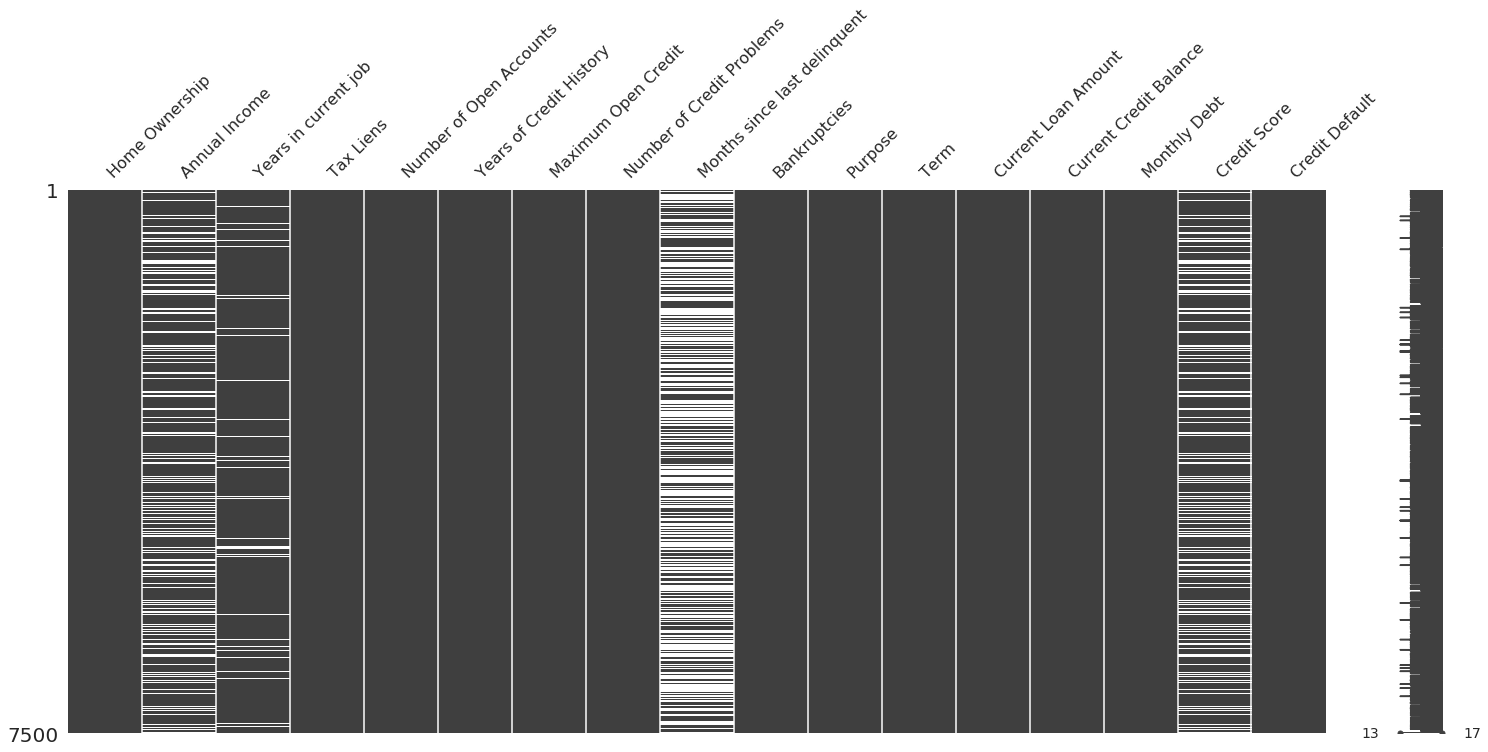

In [179]:
view_matrix_in(df_train)

In [181]:
from sklearn.preprocessing import LabelEncoder

In [182]:
def prepare_label(df_train):
    '''функция преобразующая строковые объекты в метки'''
    
    le = LabelEncoder()

    for col in df_train.columns:       
        if df_train[col].dtypes=='object':
            df_train[col]=le.fit_transform(df_train[col].astype(str))
    return df_train        

In [183]:
prepare_label(df_train)

Home Ownership  Annual Income  Years in current job  Tax Liens  \
0                  2       482087.0                    11        0.0   
1                  2      1025487.0                     1        0.0   
2                  1       751412.0                     8        0.0   
3                  2       805068.0                     6        0.0   
4                  3       776264.0                     8        0.0   
...              ...            ...                   ...        ...   
7495               3       402192.0                    10        0.0   
7496               1      1533984.0                     0        0.0   
7497               3      1878910.0                     6        0.0   
7498               1            NaN                    11        0.0   
7499               3            NaN                     4        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                        11.0                     26.3             685960.0   
1                        15.0                     15.3            1181730.0   
2                        11.0                     35.0            1182434.0   
3                         8.0                     22.5             147400.0   
4                        13.0                     13.6             385836.0   
...                       ...                      ...                  ...   
7495                      3.0                      8.5             107866.0   
7496                     10.0                     26.5             686312.0   
7497                     12.0                     32.1            1778920.0   
7498                     21.0                     26.5            1141250.0   
7499                      8.0                      9.4             480832.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                           1.0                           NaN           1.0   
1                           0.0                           NaN           0.0   
2                           0.0                           NaN           0.0   
3                           1.0                           NaN           1.0   
4                           1.0                           NaN           0.0   
...                         ...                           ...           ...   
7495                        0.0                           NaN           0.0   
7496                        0.0                          43.0           0.0   
7497                        0.0                           NaN           0.0   
7498                        0.0                           NaN           0.0   
7499                        0.0                           NaN           0.0   

      Purpose  Term  Current Loan Amount  Current Credit Balance  \
0           3     1           99999999.0                 47386.0   
1           3     0             264968.0                394972.0   
2           3     1           99999999.0                308389.0   
3           3     1             121396.0                 95855.0   
4           3     1             125840.0                 93309.0   
...       ...   ...                  ...                     ...   
7495        9     1             129360.0                 73492.0   
7496        3     0             444048.0                456399.0   
7497        1     1           99999999.0                477812.0   
7498        3     1             615274.0                476064.0   
7499        3     1              26928.0                288192.0   

      Monthly Debt  Credit Score  Credit Default  
0           7914.0         749.0               0  
1          18373.0         737.0               1  
2          13651.0         742.0               0  
3          11338.0         694.0               0  
4           7180.0         719.0               0  
...            ...           ...             ...  
7495        1900.0         697.0               0  
7496       12783.0

In [327]:
>>> import numpy as np
>>> from sklearn.impute import KNNImputer
def missing_knn(df_train):

    imputer = KNNImputer(n_neighbors=2)
    imputer.fit_transform(df_train)
    return df_train


In [328]:
missing_knn(df_train)

Home Ownership  Annual Income  Years in current job  Tax Liens  \
0                2.0   4.820870e+05                  11.0        0.0   
1                2.0   1.025487e+06                   1.0        0.0   
2                1.0   7.514120e+05                   8.0        0.0   
3                2.0   8.050680e+05                   6.0        0.0   
4                3.0   7.762640e+05                   8.0        0.0   
...              ...            ...                   ...        ...   
7495             3.0   4.021920e+05                  10.0        0.0   
7496             1.0   1.533984e+06                   0.0        0.0   
7497             3.0   1.878910e+06                   6.0        0.0   
7498             1.0   1.742559e+06                  11.0        0.0   
7499             3.0   1.402122e+06                   4.0        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                        11.0                     26.3             685960.0   
1                        15.0                     15.3            1181730.0   
2                        11.0                     35.0            1182434.0   
3                         8.0                     22.5             147400.0   
4                        13.0                     13.6             385836.0   
...                       ...                      ...                  ...   
7495                      3.0                      8.5             107866.0   
7496                     10.0                     26.5             686312.0   
7497                     12.0                     32.1            1778920.0   
7498                     21.0                     26.5            1141250.0   
7499                      8.0                      9.4             480832.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                           1.0                     57.455154           1.0   
1                           0.0                     -7.903605           0.0   
2                           0.0                     29.691961           0.0   
3                           1.0                     39.758936           1.0   
4                           1.0                    -16.576463           0.0   
...                         ...                           ...           ...   
7495                        0.0                     34.475849           0.0   
7496                        0.0                     43.000000           0.0   
7497                        0.0                     43.147561           0.0   
7498                        0.0                     40.818928           0.0   
7499                        0.0                     -0.306223           0.0   

      Purpose  Term  Current Loan Amount  Current Credit Balance  \
0         3.0   1.0           99999999.0                 47386.0   
1         3.0   0.0             264968.0                394972.0   
2         3.0   1.0           99999999.0                308389.0   
3         3.0   1.0             121396.0                 95855.0   
4         3.0   1.0             125840.0                 93309.0   
...       ...   ...                  ...                     ...   
7495      9.0   1.0             129360.0                 73492.0   
7496      3.0   0.0             444048.0                456399.0   
7497      1.0   1.0           99999999.0                477812.0   
7498      3.0   1.0             615274.0                476064.0   
7499      3.0   1.0              26928.0                288192.0   

      Monthly Debt  Credit Score  Credit Default  
0           7914.0    749.000000             0.0  
1          18373.0    737.000000             1.0  
2          13651.0    742.000000             0.0  
3          11338.0    694.000000             0.0  
4           7180.0    719.000000             0.0  
...            ...           ...             ...  
7495        1900.0    697.000000             0.0  
7496       12783.0

In [215]:
def missing_imputer(df_train):
    # Subset numeric features: numeric_cols
    numeric_cols = df_train.select_dtypes(include=[np.number])

    # Iteratively impute
    imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
    loans_imp_iter = imp_iter.fit_transform(numeric_cols)

    # Convert returned array to DataFrame
    df_train = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)
    
    return df_train
    

In [217]:
missing_imputer(df_train)

Home Ownership  Annual Income  Years in current job  Tax Liens  \
0                2.0   4.820870e+05                  11.0        0.0   
1                2.0   1.025487e+06                   1.0        0.0   
2                1.0   7.514120e+05                   8.0        0.0   
3                2.0   8.050680e+05                   6.0        0.0   
4                3.0   7.762640e+05                   8.0        0.0   
...              ...            ...                   ...        ...   
7495             3.0   4.021920e+05                  10.0        0.0   
7496             1.0   1.533984e+06                   0.0        0.0   
7497             3.0   1.878910e+06                   6.0        0.0   
7498             1.0   1.742559e+06                  11.0        0.0   
7499             3.0   1.402122e+06                   4.0        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                        11.0                     26.3             685960.0   
1                        15.0                     15.3            1181730.0   
2                        11.0                     35.0            1182434.0   
3                         8.0                     22.5             147400.0   
4                        13.0                     13.6             385836.0   
...                       ...                      ...                  ...   
7495                      3.0                      8.5             107866.0   
7496                     10.0                     26.5             686312.0   
7497                     12.0                     32.1            1778920.0   
7498                     21.0                     26.5            1141250.0   
7499                      8.0                      9.4             480832.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                           1.0                     57.455154           1.0   
1                           0.0                     -7.903605           0.0   
2                           0.0                     29.691961           0.0   
3                           1.0                     39.758936           1.0   
4                           1.0                    -16.576463           0.0   
...                         ...                           ...           ...   
7495                        0.0                     34.475849           0.0   
7496                        0.0                     43.000000           0.0   
7497                        0.0                     43.147561           0.0   
7498                        0.0                     40.818928           0.0   
7499                        0.0                     -0.306223           0.0   

      Purpose  Term  Current Loan Amount  Current Credit Balance  \
0         3.0   1.0           99999999.0                 47386.0   
1         3.0   0.0             264968.0                394972.0   
2         3.0   1.0           99999999.0                308389.0   
3         3.0   1.0             121396.0                 95855.0   
4         3.0   1.0             125840.0                 93309.0   
...       ...   ...                  ...                     ...   
7495      9.0   1.0             129360.0                 73492.0   
7496      3.0   0.0             444048.0                456399.0   
7497      1.0   1.0           99999999.0                477812.0   
7498      3.0   1.0             615274.0                476064.0   
7499      3.0   1.0              26928.0                288192.0   

      Monthly Debt  Credit Score  Credit Default  
0           7914.0    749.000000             0.0  
1          18373.0    737.000000             1.0  
2          13651.0    742.000000             0.0  
3          11338.0    694.000000             0.0  
4           7180.0    719.000000             0.0  
...            ...           ...             ...  
7495        1900.0    697.000000             0.0  
7496       12783.0

In [329]:
def prepare_missing_n_label(df_train):
    
    ''' сборная функция обрабатывающая пропуски и присваивающая метки'''
    
#     missing_imputer(df_train)
    missing_knn(df_train)
    prepare_label(df_train)
    return df_train


In [330]:
df_train=prepare_missing_n_label(df_train)

'/usr/local/share/datasets/matrix_sorted.png'

   Home Ownership  Annual Income  Years in current job  Tax Liens  \
0             2.0       482087.0                  11.0        0.0   
1             2.0      1025487.0                   1.0        0.0   
2             1.0       751412.0                   8.0        0.0   
3             2.0       805068.0                   6.0        0.0   
4             3.0       776264.0                   8.0        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                     57.

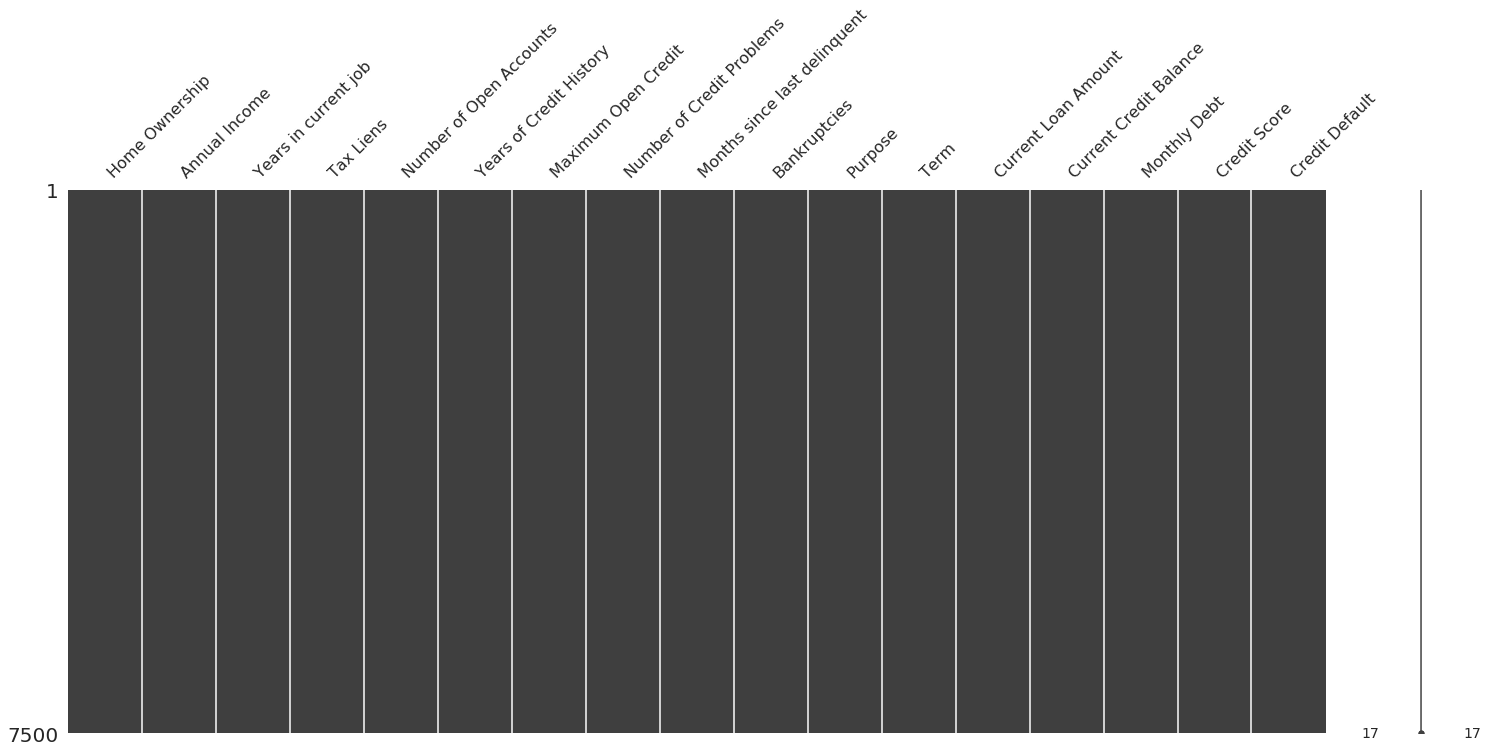

In [331]:
view_matrix_in(df_train)

In [164]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [332]:

TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()

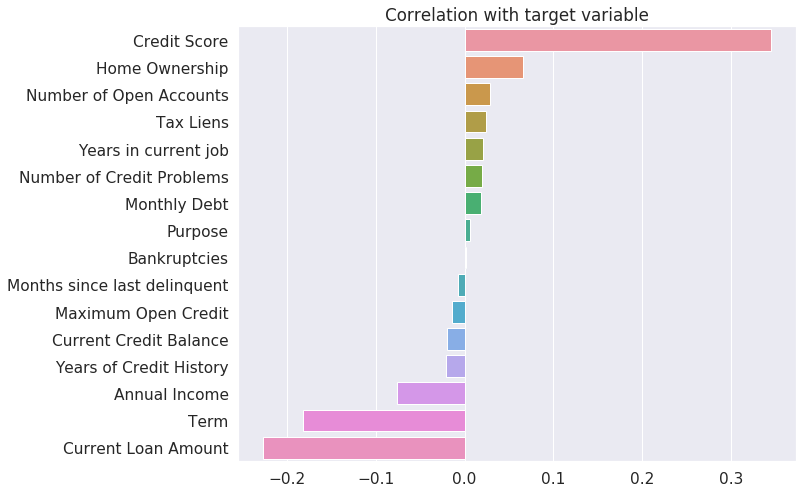

In [333]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [232]:
correlations_data = df_train.corr()[TARGET_NAME].sort_values()

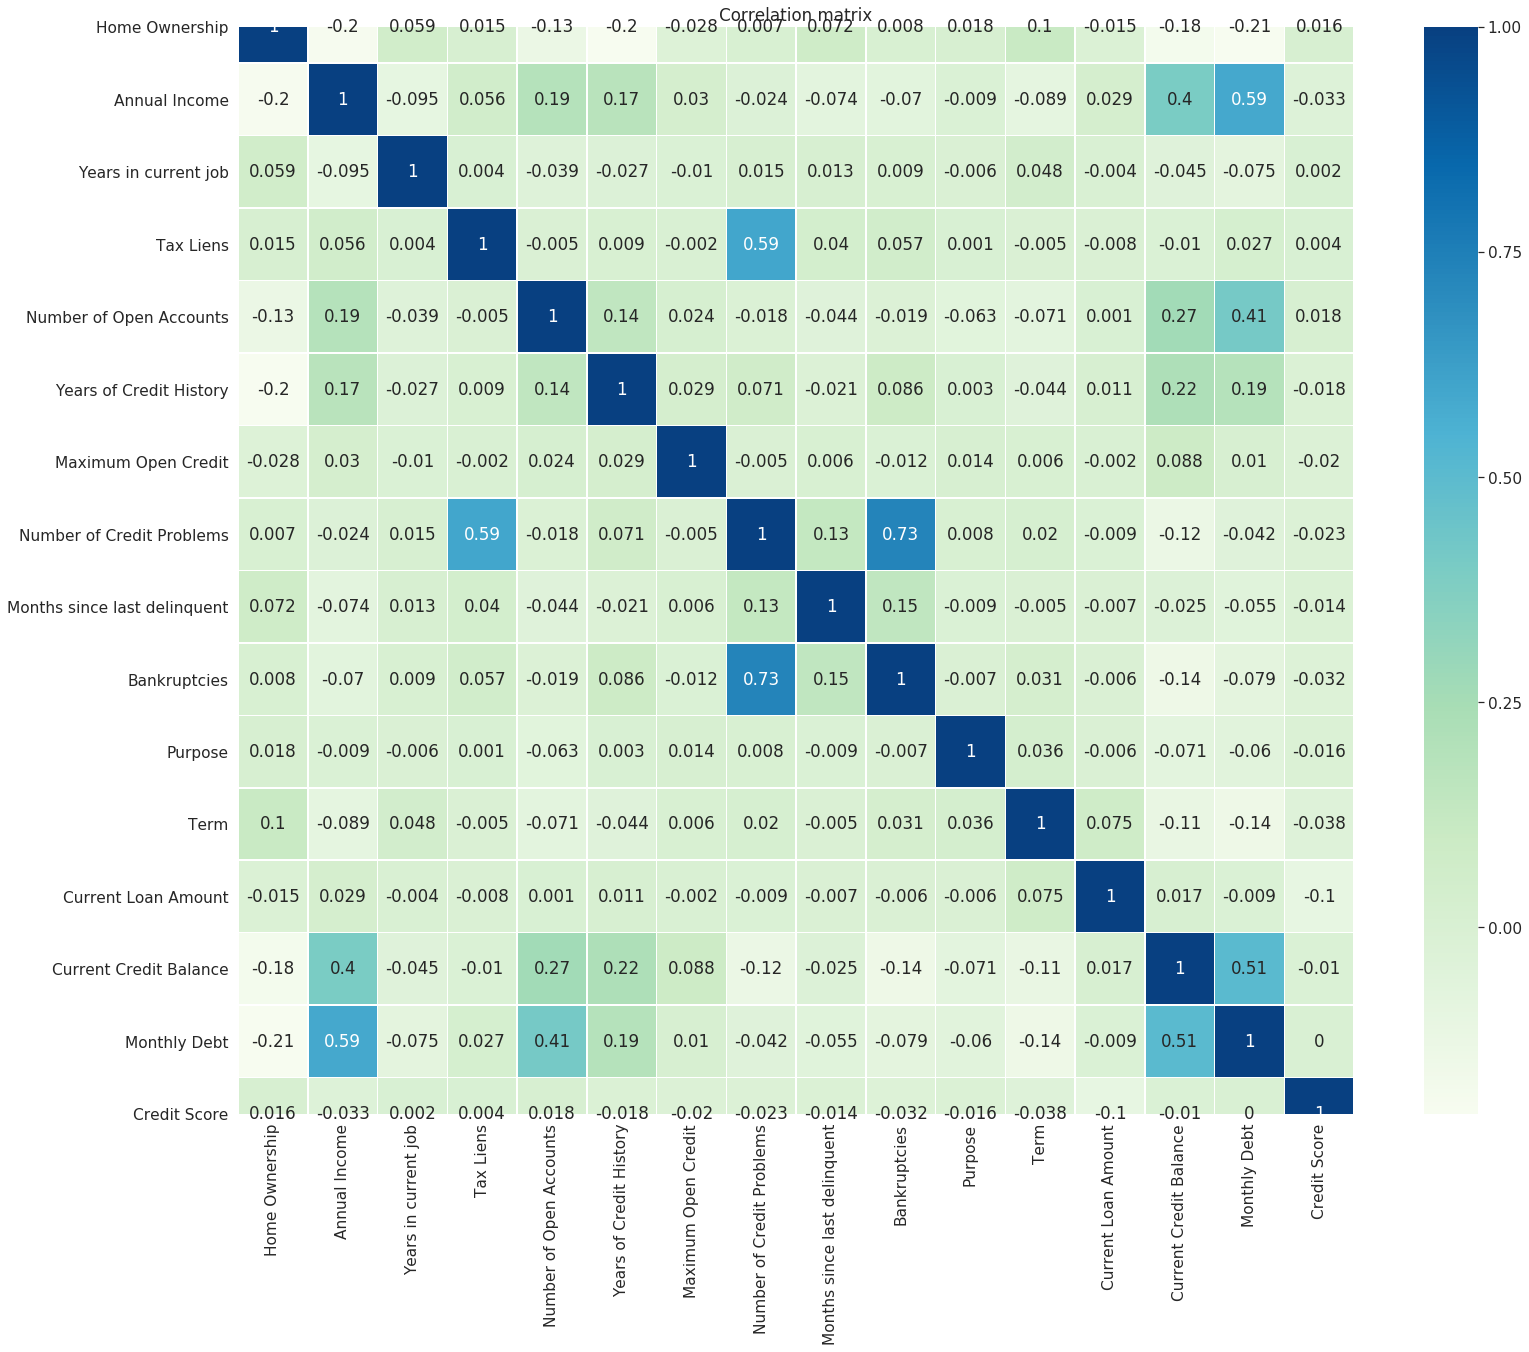

In [233]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [173]:
sns.pairplot(df_train_select_6, hue = TARGET_NAME, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

NameError: name 'df_train_select_6' is not defined

In [234]:
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

In [235]:
from imblearn.over_sampling import SMOTE

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(df_train)

df_train_final=pd.DataFrame(rescaledX_train, columns=numeric_cols.columns)
df_train_final

In [435]:


feats = ['Home Ownership', 'Annual Income', 'Years in current job',
       , 'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score']

# feats=['Current Loan Amount',
#        'Credit Score',
#         'Term',
#         'Annual Income',
#         'Maximum Open Credit',
#         'Monthly Debt',
#         'Current Credit Balance',
#         'Years of Credit History',
#         'Number of Open Accounts',
#         'Years in current job',
#         'Home Ownership']
# feats = ['Home Ownership', 'Annual Income', 
#        'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
#        'Credit Score']

# feats = ['Current Loan Amount',
# 'Credit Score',
# 'Annual Income',
# 'Maximum Open Credit',
# 'Monthly Debt',
# 'Current Credit Balance',
# 'Years of Credit History',
# 'Number of Open Accounts',
# 'Years in current job',
# 'Term',
# 'Home Ownership']

In [411]:
from sklearn.preprocessing import StandardScaler

In [412]:
def standart_df(df_train, feats):


    scaler = StandardScaler()

    df_norm = df_train.copy()
    df_norm[feats] = scaler.fit_transform(df_norm[feats])

    data = df_norm.copy()
    return data


In [436]:
data=standart_df(df_train, feats)

In [437]:
X = data[feats]
y = data['Credit Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)

In [355]:


def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=0.99)



In [438]:

sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [357]:
TARGET_NAME = 'Credit Default'
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0.0    4034
1.0    3070
Name: Credit Default, dtype: int64

In [417]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [359]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [360]:
from imblearn.over_sampling import SMOTE 

In [361]:
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

import xgboost as xgb

In [439]:
X = data[feats]
y = data['Credit Default']

In [440]:
from catboost import Pool, CatBoostClassifier, EFstrType

pool = Pool(X, y)

res_fe=model_ctb.get_feature_importance(data=pool,     
                                        type=EFstrType.FeatureImportance,
                                        prettified=True,
                                        thread_count=-1,
                                        verbose=True)

res_fe


Used dataset leave statistics for fstr calculation


Feature Id  Importances
0       Current Loan Amount    37.382253
1              Credit Score    29.472917
2             Annual Income     6.143271
3                      Term     5.727270
4              Monthly Debt     4.330726
5       Maximum Open Credit     4.308429
6    Current Credit Balance     2.826095
7   Years of Credit History     2.730532
8            Home Ownership     2.559037
9   Number of Open Accounts     2.388075
10     Years in current job     2.131394

In [364]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [365]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [249]:
param_dist_l = {"boosting_type": ["gbdt","dart","goss","rf"],
              "num_leaves": randint(1, 40),
              "max_depth": randint(-10, 9),
#               "learning_rate": randint(0.1,0.9),
               "n_estimators":randint(1, 200),
               "random_state":randint(1,200),
               "class_weight":['balanced',None]}

#  (string, optional (default='gbdt')) – ‘gbdt’, traditional Gradient Boosting Decision Tree. ‘dart’, Dropouts meet Multiple Additive Regression Trees. ‘goss’, Gradient-based One-Side Sampling. ‘rf’, Random Forest.
# num_leaves (int, optional (default=31)) – Maximum tree leaves for base learners.
# max_depth (int, optional (default=-1)) – Maximum tree depth for base learners, <=0 means no limit.
# learning_rate (float, optional (default=0.1)) – Boosting learning rate. You can use callbacks parameter of fit method to shrink/adapt learning rate in training using reset_parameter callback. Note, that this will ignore the learning_rate argument in training.
# n_estimators (int, optional (default=100)) – Number of boosted trees to fit.
# subsample_for_bin (int, optional (default=200000)) – Number of samples for constructing bins.
# objective (string, callable or None, optional (default=None)) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below). Default: ‘regression’ for LGBMRegressor, ‘binary’ or ‘multiclass’ for LGBMClassifier, ‘lambdarank’ for LGBMRanker.

In [250]:
# model_lgbm = lgbm.LGBMClassifier(boosting_type='dart', max_depth=-7, n_estimators = 189, num_leaves=29,random_state=124)
# 'boosting_type': 'dart', 'max_depth': -7, 'n_estimators': 189, 'num_leaves': 29, 'random_state': 124
model_lgbm = lgbm.LGBMClassifier(boosting_type='goss', max_depth=-9, n_estimators = 151, num_leaves=35,random_state=145)
model_lgbm.fit(X_train_res, y_train_res.ravel())
# X_train_res, y_train_res.ravel()

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      4037
         1.0       0.89      0.94      0.91      3067

    accuracy                           0.92      7104
   macro avg       0.92      0.92      0.92      7104
weighted avg       0.92      0.92      0.92      7104

TEST

              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      1313
         1.0       0.47      0.52      0.50       562

    accuracy                           0.68      1875
   macro avg       0.63      0.64      0.63      1875
weighted avg       0.69      0.68      0.69      1875

CONFUSION MATRIX

col_0           0.0  1.0
Credit Default          
0.0             988  325
1.0             268  294


In [251]:
sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

lr1 = LogisticRegression()

lr1.fit(X_train_res, y_train_res.ravel())

y_train_pred = lr1.predict(X_train)
y_test_pred = lr1.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)
  
# печать отчета о классификации

# print(classification_report(y_test, predictions)) 

TRAIN

              precision    recall  f1-score   support

         0.0       0.70      0.62      0.66      4037
         1.0       0.56      0.64      0.60      3067

    accuracy                           0.63      7104
   macro avg       0.63      0.63      0.63      7104
weighted avg       0.64      0.63      0.63      7104

TEST

              precision    recall  f1-score   support

         0.0       0.80      0.59      0.68      1313
         1.0       0.41      0.66      0.50       562

    accuracy                           0.61      1875
   macro avg       0.60      0.62      0.59      1875
weighted avg       0.68      0.61      0.63      1875

CONFUSION MATRIX

col_0           0.0  1.0
Credit Default          
0.0             772  541
1.0             192  370


In [252]:

tree_cv = RandomizedSearchCV(model_lgbm,param_dist_l, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
# print('Importance{}'.format(tree_cv.feature_importances_))

Tuned Decision Tree Parameters: {'boosting_type': 'dart', 'class_weight': None, 'max_depth': -10, 'n_estimators': 131, 'num_leaves': 33, 'random_state': 3}
Best score is 0.7294493066775034


In [420]:
model_xgb = xgb.XGBClassifier(boosting_type='dart', 
                              class_weight= None, 
                              max_depth = 7, 
                              n_estimators=195, 
                              num_leaves = 20, 
                              random_state = 185)
# model_xgb.fit(X_train_res, y_train_res.ravel())
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      4034
         1.0       0.98      0.95      0.96      3070

    accuracy                           0.97      7104
   macro avg       0.97      0.97      0.97      7104
weighted avg       0.97      0.97      0.97      7104

TEST

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82      1313
         1.0       0.57      0.45      0.50       562

    accuracy                           0.73      1875
   macro avg       0.67      0.65      0.66      1875
weighted avg       0.72      0.73      0.72      1875

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1120  193
1.0              310  252


In [259]:
tree_x = RandomizedSearchCV(model_xgb,param_dist_l, cv=5)

# Fit it to the data
tree_x.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_x.best_params_))
print("Best score is {}".format(tree_x.best_score_))
# print('Importance{}'.format(tree_cv.feature_importances_))

Tuned Decision Tree Parameters: {'boosting_type': 'dart', 'class_weight': None, 'max_depth': 7, 'n_estimators': 178, 'num_leaves': 20, 'random_state': 185}
Best score is 0.7819551793519739


In [367]:
from catboost import CatBoostClassifier, Pool

In [441]:
X = data[feats]
y = data['Credit Default']

In [442]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [443]:
model_ctb = CatBoostClassifier(
#                                 class_weights=[1,1.5],
                               best_model_min_trees=95, 
                               l2_leaf_reg=53,
                               loss_function ='Logloss',
                               max_depth= 7, 
                               n_estimators=992,
                               od_wait=8,
                               random_state=198,
                               silent=True,
                               learning_rate=0.01)

# model_ctb.fit(X_train, y_train)
model_ctb.fit(X_resampled, y_resampled)


y_train_pred = model_ctb.predict(X_train)
y_test_pred = model_ctb.predict(X_test)
y_test_pred_probs = model_ctb.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      4074
         1.0       0.62      0.58      0.60      1551

    accuracy                           0.79      5625
   macro avg       0.73      0.72      0.73      5625
weighted avg       0.78      0.79      0.78      5625

TEST

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1313
         1.0       0.66      0.60      0.63       562

    accuracy                           0.79      1875
   macro avg       0.75      0.73      0.74      1875
weighted avg       0.78      0.79      0.78      1875

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1140  173
1.0              226  336


In [431]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

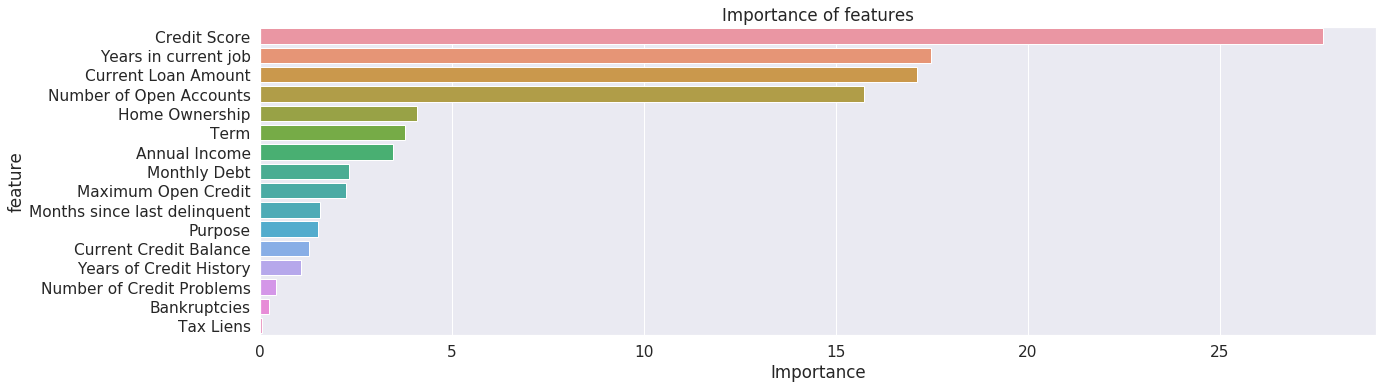

In [444]:
important_features_top = show_feature_importances(X.columns, model_ctb.feature_importances_, get_top=15)

In [406]:


eval_dataset = Pool(X_test,
                    y_test)

model = CatBoostClassifier(eval_metric='AUC')

model.fit(X_train,
          y_train,
          eval_set=eval_dataset,
          verbose=False)

print(model.get_all_params())
print(model.get_best_iteration())

{'nan_mode': 'Min', 'eval_metric': 'AUC', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'fold_permutation_block': 0, 'leaf_estimation_method': 'Newton', 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'approx_on_full_history': False, 'subsample': 0.800000011920929, 'use_best_model': True, 'class_names': [0, 1], 'random_seed': 0, 'depth': 6, 'has_time': False, 'fold_len_multiplier': 2, 'border_count': 254, 'classes_count': 0, 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'loss_function': 'Logloss', 'learning_rate': 0.05143199861049652, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_estimation_iterations': 10, 'bootstrap_type': 'MVS', 'permutation_count': 4}
102


In [302]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

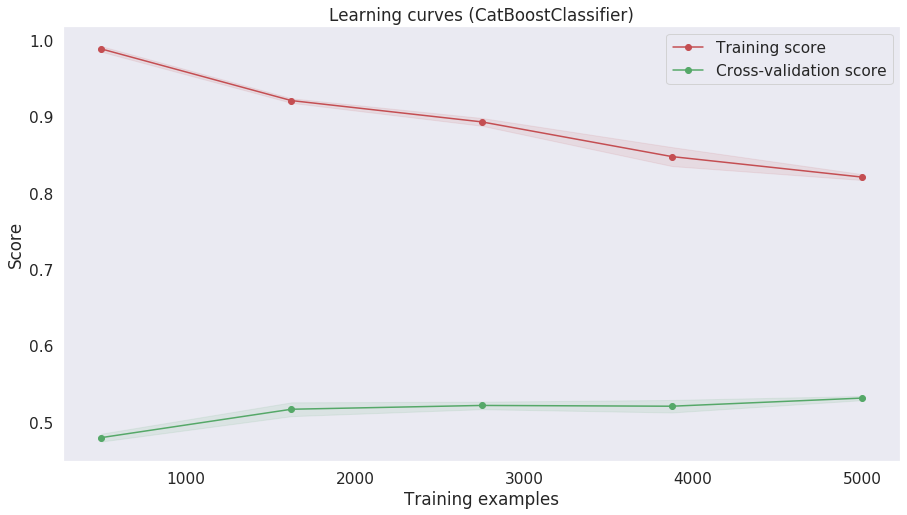

In [304]:
show_learning_curve_plot(model_ctb, X, y)

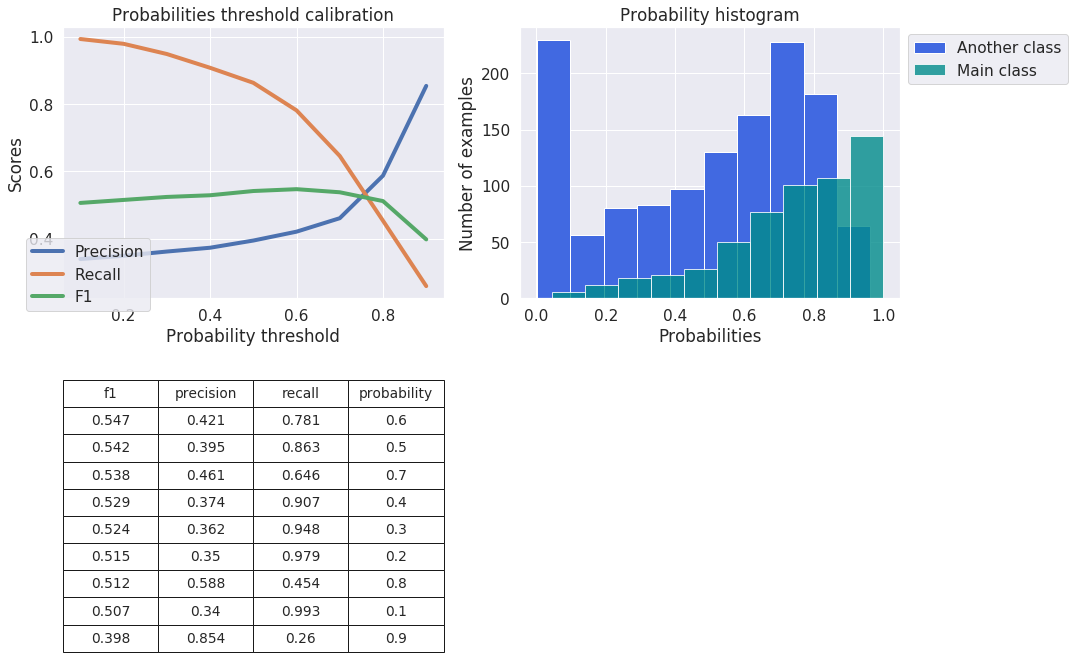

In [297]:
y_test_pred_probs = model_ctb.predict_proba(X_test)
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

In [395]:
from scipy.stats import uniform

In [397]:
params_c = {'n_estimators':randint(0,1000),
          'max_depth':randint(0,100),
           'od_wait' : randint(0,10),
           'best_model_min_trees': randint(0,100),
           'random_state': randint(0,200),
            'loss_function':['Logloss','CrossEntropy'],
#             'od_type':['IncToDec','Iter'],
           'l2_leaf_reg':randint(0,100),
            'learning_rate':uniform(loc=0,scale=10)
#            'use_best_model':[True,False]
           }
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [399]:
rs = RandomizedSearchCV(model_ctb, params_c, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X_train, y_train)
rs.best_params_,rs.best_score_

0:	learn: 0.6704453	total: 18.4s	remaining: 20m 14s
1:	learn: 0.6384995	total: 22.2s	remaining: 12m 2s
2:	learn: 0.6202347	total: 26s	remaining: 9m 14s
3:	learn: 0.6029238	total: 26.5s	remaining: 6m 56s
4:	learn: 0.5830175	total: 26.6s	remaining: 5m 29s
5:	learn: 0.5757983	total: 30.8s	remaining: 5m 13s
6:	learn: 0.5693255	total: 35.2s	remaining: 5m 1s
7:	learn: 0.5617670	total: 39s	remaining: 4m 47s
8:	learn: 0.5549277	total: 42.8s	remaining: 4m 36s
9:	learn: 0.5487872	total: 46.6s	remaining: 4m 25s
10:	learn: 0.5437776	total: 50.3s	remaining: 4m 16s
11:	learn: 0.5370574	total: 54s	remaining: 4m 7s
12:	learn: 0.5316350	total: 57.7s	remaining: 3m 59s
13:	learn: 0.5255267	total: 1m 1s	remaining: 3m 52s
14:	learn: 0.5148865	total: 1m 1s	remaining: 3m 33s
15:	learn: 0.5106788	total: 1m 5s	remaining: 3m 28s
16:	learn: 0.5063279	total: 1m 9s	remaining: 3m 23s
17:	learn: 0.5012600	total: 1m 13s	remaining: 3m 18s
18:	learn: 0.4966425	total: 1m 16s	remaining: 3m 14s
19:	learn: 0.4922764	total:

({'best_model_min_trees': 86,
  'l2_leaf_reg': 26,
  'learning_rate': 0.5134019991978755,
  'loss_function': 'Logloss',
  'max_depth': 13,
  'n_estimators': 67,
  'od_wait': 8,
  'random_state': 134},
 0.6980105741024092)

In [100]:
model_ctb = CatBoostClassifier()
model_ctb.fit(X_train, y_train)

res1902 = model_ctb.calc_feature_statistics(X,
                                    y,
                                    feature=feats,
                                    plot=True)

Learning rate set to 0.023797
0:	learn: 0.6832758	total: 80.9ms	remaining: 1m 20s
1:	learn: 0.6755167	total: 161ms	remaining: 1m 20s
2:	learn: 0.6684542	total: 239ms	remaining: 1m 19s
3:	learn: 0.6595667	total: 318ms	remaining: 1m 19s
4:	learn: 0.6519221	total: 396ms	remaining: 1m 18s
5:	learn: 0.6428538	total: 472ms	remaining: 1m 18s
6:	learn: 0.6351276	total: 553ms	remaining: 1m 18s
7:	learn: 0.6308273	total: 631ms	remaining: 1m 18s
8:	learn: 0.6264346	total: 709ms	remaining: 1m 18s
9:	learn: 0.6213190	total: 764ms	remaining: 1m 15s
10:	learn: 0.6172715	total: 842ms	remaining: 1m 15s
11:	learn: 0.6142662	total: 933ms	remaining: 1m 16s
12:	learn: 0.6110452	total: 1.01s	remaining: 1m 16s
13:	learn: 0.6069186	total: 1.09s	remaining: 1m 16s
14:	learn: 0.6025269	total: 1.17s	remaining: 1m 16s
15:	learn: 0.5979188	total: 1.25s	remaining: 1m 16s
16:	learn: 0.5961205	total: 1.32s	remaining: 1m 16s
17:	learn: 0.5940213	total: 1.43s	remaining: 1m 17s
18:	learn: 0.5909501	total: 1.51s	remaining

158:	learn: 0.5046137	total: 16.1s	remaining: 1m 25s
159:	learn: 0.5043210	total: 16.3s	remaining: 1m 25s
160:	learn: 0.5040776	total: 16.4s	remaining: 1m 25s
161:	learn: 0.5036902	total: 16.5s	remaining: 1m 25s
162:	learn: 0.5034870	total: 16.6s	remaining: 1m 25s
163:	learn: 0.5032275	total: 16.7s	remaining: 1m 25s
164:	learn: 0.5029771	total: 16.8s	remaining: 1m 25s
165:	learn: 0.5026612	total: 16.9s	remaining: 1m 24s
166:	learn: 0.5024742	total: 17s	remaining: 1m 24s
167:	learn: 0.5022301	total: 17.1s	remaining: 1m 24s
168:	learn: 0.5018538	total: 17.2s	remaining: 1m 24s
169:	learn: 0.5015354	total: 17.3s	remaining: 1m 24s
170:	learn: 0.5012747	total: 17.4s	remaining: 1m 24s
171:	learn: 0.5010300	total: 17.5s	remaining: 1m 24s
172:	learn: 0.5008328	total: 17.6s	remaining: 1m 24s
173:	learn: 0.5006200	total: 17.7s	remaining: 1m 23s
174:	learn: 0.5001278	total: 17.8s	remaining: 1m 23s
175:	learn: 0.4998736	total: 18s	remaining: 1m 24s
176:	learn: 0.4995533	total: 18.1s	remaining: 1m 2

328:	learn: 0.4599022	total: 33.5s	remaining: 1m 8s
329:	learn: 0.4596696	total: 33.6s	remaining: 1m 8s
330:	learn: 0.4594940	total: 33.7s	remaining: 1m 8s
331:	learn: 0.4593249	total: 33.8s	remaining: 1m 7s
332:	learn: 0.4591672	total: 33.9s	remaining: 1m 7s
333:	learn: 0.4589318	total: 34s	remaining: 1m 7s
334:	learn: 0.4586700	total: 34.1s	remaining: 1m 7s
335:	learn: 0.4584241	total: 34.2s	remaining: 1m 7s
336:	learn: 0.4582672	total: 34.3s	remaining: 1m 7s
337:	learn: 0.4580551	total: 34.4s	remaining: 1m 7s
338:	learn: 0.4578511	total: 34.5s	remaining: 1m 7s
339:	learn: 0.4576753	total: 34.6s	remaining: 1m 7s
340:	learn: 0.4575108	total: 34.7s	remaining: 1m 6s
341:	learn: 0.4571851	total: 34.7s	remaining: 1m 6s
342:	learn: 0.4570349	total: 34.8s	remaining: 1m 6s
343:	learn: 0.4568623	total: 34.9s	remaining: 1m 6s
344:	learn: 0.4566901	total: 35s	remaining: 1m 6s
345:	learn: 0.4564915	total: 35.1s	remaining: 1m 6s
346:	learn: 0.4562924	total: 35.1s	remaining: 1m 6s
347:	learn: 0.45

492:	learn: 0.4187622	total: 49.2s	remaining: 50.6s
493:	learn: 0.4185333	total: 49.4s	remaining: 50.6s
494:	learn: 0.4183803	total: 49.5s	remaining: 50.5s
495:	learn: 0.4181165	total: 49.6s	remaining: 50.4s
496:	learn: 0.4176313	total: 49.7s	remaining: 50.3s
497:	learn: 0.4173155	total: 49.8s	remaining: 50.2s
498:	learn: 0.4169353	total: 49.9s	remaining: 50.1s
499:	learn: 0.4165635	total: 50s	remaining: 50s
500:	learn: 0.4163205	total: 50s	remaining: 49.9s
501:	learn: 0.4160307	total: 50.1s	remaining: 49.7s
502:	learn: 0.4158201	total: 50.2s	remaining: 49.6s
503:	learn: 0.4156233	total: 50.3s	remaining: 49.5s
504:	learn: 0.4154670	total: 50.4s	remaining: 49.4s
505:	learn: 0.4152336	total: 50.5s	remaining: 49.3s
506:	learn: 0.4149618	total: 50.6s	remaining: 49.2s
507:	learn: 0.4146251	total: 50.6s	remaining: 49s
508:	learn: 0.4143948	total: 50.7s	remaining: 48.9s
509:	learn: 0.4141167	total: 50.8s	remaining: 48.8s
510:	learn: 0.4137191	total: 50.9s	remaining: 48.7s
511:	learn: 0.413427

666:	learn: 0.3766131	total: 1m 4s	remaining: 32.3s
667:	learn: 0.3764833	total: 1m 4s	remaining: 32.2s
668:	learn: 0.3762801	total: 1m 4s	remaining: 32.1s
669:	learn: 0.3761298	total: 1m 5s	remaining: 32s
670:	learn: 0.3758874	total: 1m 5s	remaining: 31.9s
671:	learn: 0.3756648	total: 1m 5s	remaining: 31.8s
672:	learn: 0.3754737	total: 1m 5s	remaining: 31.7s
673:	learn: 0.3751861	total: 1m 5s	remaining: 31.6s
674:	learn: 0.3750587	total: 1m 5s	remaining: 31.5s
675:	learn: 0.3748768	total: 1m 5s	remaining: 31.4s
676:	learn: 0.3746806	total: 1m 5s	remaining: 31.3s
677:	learn: 0.3745246	total: 1m 5s	remaining: 31.2s
678:	learn: 0.3743357	total: 1m 5s	remaining: 31.1s
679:	learn: 0.3741482	total: 1m 5s	remaining: 31s
680:	learn: 0.3739995	total: 1m 5s	remaining: 30.9s
681:	learn: 0.3738070	total: 1m 5s	remaining: 30.8s
682:	learn: 0.3736047	total: 1m 6s	remaining: 30.7s
683:	learn: 0.3734663	total: 1m 6s	remaining: 30.5s
684:	learn: 0.3732360	total: 1m 6s	remaining: 30.4s
685:	learn: 0.37

829:	learn: 0.3442253	total: 1m 18s	remaining: 16.1s
830:	learn: 0.3440467	total: 1m 18s	remaining: 16s
831:	learn: 0.3439080	total: 1m 18s	remaining: 15.9s
832:	learn: 0.3437675	total: 1m 19s	remaining: 15.8s
833:	learn: 0.3435153	total: 1m 19s	remaining: 15.7s
834:	learn: 0.3433174	total: 1m 19s	remaining: 15.6s
835:	learn: 0.3431419	total: 1m 19s	remaining: 15.5s
836:	learn: 0.3430095	total: 1m 19s	remaining: 15.4s
837:	learn: 0.3428469	total: 1m 19s	remaining: 15.4s
838:	learn: 0.3425650	total: 1m 19s	remaining: 15.3s
839:	learn: 0.3423539	total: 1m 19s	remaining: 15.2s
840:	learn: 0.3421963	total: 1m 19s	remaining: 15.1s
841:	learn: 0.3420190	total: 1m 19s	remaining: 15s
842:	learn: 0.3418044	total: 1m 19s	remaining: 14.9s
843:	learn: 0.3416472	total: 1m 19s	remaining: 14.8s
844:	learn: 0.3414336	total: 1m 19s	remaining: 14.7s
845:	learn: 0.3412140	total: 1m 20s	remaining: 14.6s
846:	learn: 0.3409669	total: 1m 20s	remaining: 14.5s
847:	learn: 0.3407459	total: 1m 20s	remaining: 14.

993:	learn: 0.3160676	total: 1m 32s	remaining: 559ms
994:	learn: 0.3159389	total: 1m 32s	remaining: 466ms
995:	learn: 0.3156555	total: 1m 32s	remaining: 373ms
996:	learn: 0.3155053	total: 1m 32s	remaining: 280ms
997:	learn: 0.3154583	total: 1m 33s	remaining: 186ms
998:	learn: 0.3152956	total: 1m 33s	remaining: 93.2ms
999:	learn: 0.3151518	total: 1m 33s	remaining: 0us


In [115]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

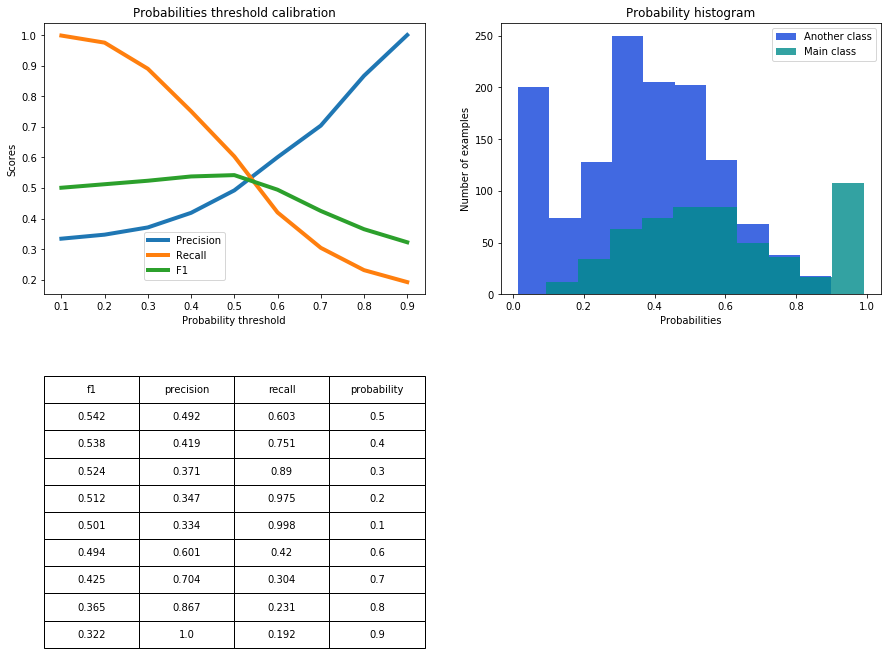

In [118]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

In [268]:
eval_dataset = Pool(X_test,y_test)

model_it = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC')

model.fit(X_train,
          y_train,
          eval_set=eval_dataset,
          verbose=False)

print(model.get_best_iteration())

203


In [54]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [56]:
rs.best_params_

{'best_model_min_trees': 65,
 'max_depth': 8,
 'n_estimators': 18,
 'od_wait': 2,
 'random_state': 195}

In [57]:
rs.best_score_

0.4222661631096473

In [ ]:
eta gamma max_depth min_child_weight max_delta_step subsample

bst.best_score, bst.best_iteration and bst.best_ntree_limit

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

y_train_pred = model_rfc.predict(X_train)
y_test_pred = model_rfc.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
tree_rfc = RandomizedSearchCV(model_rfc,param_dist_l, cv=5)

# Fit it to the data
tree_rfc.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_rfc.best_params_))
print("Best score is {}".format(tree_rfc.best_score_))

In [ ]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=15, 
                              random_state=1,
                              max_features = 6)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)


In [ ]:
categorical_columns = [c for c in df_train.columns if df_train[c].dtype.name == 'object']
numerical_columns   = [c for c in df_train.columns if df_train[c].dtype.name != 'object']
# binary_columns    = [c for c in numerical_columns if df_train[c]['unique'] == 2]
# nonbinary_columns = [c for c in numerical_columns if df_train[c]['unique'] > 2]



In [ ]:
data_numerical = df_train[numerical_columns]
data_numerical = (data_numerical - df_train.mean()) / df_train.std()
data_numerical.describe()

In [ ]:
data = pd.DataFrame(data_numerical, dtype=float)
data

In [ ]:
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [ ]:
# scaler = StandardScaler()

# df_norm = df_train.copy()
# df_norm = scaler.fit_transform(df_norm)

# df = df_norm.copy()
# df

# scaler = StandardScaler()

# df_norm = df_train.copy()
# df_norm[feats] = scaler.fit_transform(df_norm[feats])

# data = df_norm.copy()

In [ ]:
X = df[['Monthly Debt','Credit Score','Home Ownership']]
y = df[['Credit Default']]




In [ ]:
from collections import Counter
from imblearn.datasets import make_imbalance
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks


In [305]:


def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()



In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

X, y = make_classification(n_classes=2, class_sep=2,
                            weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
  n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)
X_train

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [ ]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

In [ ]:
TARGET_NAME='Credit Default'

df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
# df_balanced[['Credit Default']].value_counts()

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:


start_functions(data)
data = pd.get_dummies(data)



df_norm = data.copy()
df_norm[feats] = scaler.fit_transform(df_norm[feats])

data = df_norm.copy()


test_pred = model_xgb.predict(data[feats])



data['Credit Default'] = test_pred


data['Credit Default'].to_csv('IBrilenkov_predictions.csv', index=False, header=True)



In [ ]:

Сохранение предсказаний и финальной модели
In [47]:

predicted = final_model.predict(df_test[TEST_FEATURE_NAMES_SELECTED])

In [48]:

pred = pd.DataFrame({'Credit Default': pd.Series(predicted, dtype='int64')})

In [49]:

pred.to_csv('VKazakova_predictions.csv', index=False)



In [315]:
test = pd.read_csv('test.csv')
test.shape

Out[56]:

(2500, 17)

In [57]:

# prepare data
test_data = cleaner(test)

In [58]:

test_data.describe(include='all').transpose()
#Данные почищены. Пропусков нет

Out[58]:
	count 	mean 	std 	min 	25% 	50% 	75% 	max
Id 	2500.0 	8.749500e+03 	721.832160 	7500.0 	8124.75 	8749.5 	9374.25 	9999.0
Annual Income 	2500.0 	1.225995e+06 	806124.667552 	106533.0 	700000.00 	996521.5 	1488726.00 	10000000.0
Number of Open Accounts 	2500.0 	1.117040e+01 	4.781643 	1.0 	8.00 	10.0 	14.00 	30.0
Years of Credit History 	2500.0 	1.827408e+01 	7.074991 	3.9 	13.40 	17.0 	22.10 	40.0
Maximum Open Credit 	2500.0 	6.151947e+05 	471339.939747 	0.0 	278586.00 	478676.0 	802598.50 	2000000.0
Term 	2500.0 	2.556000e-01 	0.436285 	0.0 	0.00 	0.0 	1.00 	1.0
Current Loan Amount 	2500.0 	3.113598e+05 	171521.508622 	15422.0 	187126.50 	300000.0 	398893.00 	789096.0
Current Credit Balance 	2500.0 	2.718257e+05 	224244.150567 	0.0 	110114.50 	207385.0 	366348.50 	1000000.0
Monthly Debt 	2500.0 	1.818271e+04 	11140.769524 	93.0 	10024.75 	16642.5 	24146.00 	60000.0
Credit Score 	2500.0 	7.244792e+02 	24.800411 	585.0 	717.00 	731.0 	741.00 	751.0
Home Ownership_Home Mortgage 	2500.0 	4.928000e-01 	0.500048 	0.0 	0.00 	0.0 	1.00 	1.0
Home Ownership_Own Home 	2500.0 	9.920000e-02 	0.298990 	0.0 	0.00 	0.0 	0.00 	1.0
Home Ownership_Rent 	2500.0 	4.080000e-01 	0.491561 	0.0 	0.00 	0.0 	1.00 	1.0
Tax Liens_0.0 	2500.0 	9.784000e-01 	0.145403 	0.0 	1.00 	1.0 	1.00 	1.0
Tax Liens_1.0 	2500.0 	2.000000e-02 	0.140028 	0.0 	0.00 	0.0 	0.00 	1.0
Tax Liens_4.0 	2500.0 	4.000000e-04 	0.020000 	0.0 	0.00 	0.0 	0.00 	1.0
Tax Liens_5.0 	2500.0 	1.200000e-03 	0.034627 	0.0 	0.00 	0.0 	0.00 	1.0
Number of Credit Problems_1.0 	2500.0 	9.828000e-01 	0.130042 	0.0 	1.00 	1.0 	1.00 	1.0
Number of Credit Problems_2.0 	2500.0 	1.440000e-02 	0.119157 	0.0 	0.00 	0.0 	0.00 	1.0
Number of Credit Problems_4.0 	2500.0 	2.000000e-03 	0.044686 	0.0 	0.00 	0.0 	0.00 	1.0
Number of Credit Problems_6.0 	2500.0 	4.000000e-04 	0.020000 	0.0 	0.00 	0.0 	0.00 	1.0
Number of Credit Problems_7.0 	2500.0 	4.000000e-04 	0.020000 	0.0 	0.00 	0.0 	0.00 	1.0
Purpose_business loan 	2500.0 	1.400000e-02 	0.117514 	0.0 	0.00 	0.0 	0.00 	1.0
Purpose_moving 	2500.0 	5.200000e-03 	0.071938 	0.0 	0.00 	0.0 	0.00 	1.0
Purpose_other 	2500.0 	9.808000e-01 	0.137255 	0.0 	1.00 	1.0 	1.00 	1.0
In [59]:

#Нормализация данных
test_norm = test_data.copy()
test_norm[FEATURE_NAMES] = scaler.fit_transform(test_norm[FEATURE_NAMES])

test_data = test_norm.copy()
test_data.head()

Out[59]:
	Id 	Annual Income 	Number of Open Accounts 	Years of Credit History 	Maximum Open Credit 	Term 	Current Loan Amount 	Current Credit Balance 	Monthly Debt 	Credit Score 	... 	Tax Liens_4.0 	Tax Liens_5.0 	Number of Credit Problems_1.0 	Number of Credit Problems_2.0 	Number of Credit Problems_4.0 	Number of Credit Problems_6.0 	Number of Credit Problems_7.0 	Purpose_business loan 	Purpose_moving 	Purpose_other
0 	7500 	-0.652629 	-0.453993 	-0.816289 	-0.836563 	-0.585973 	-0.868227 	-0.740054 	-1.020754 	0.262984 	... 	-0.020004 	-0.034662 	0.132291 	-0.120873 	-0.044766 	-0.020004 	-0.020004 	-0.119159 	-0.072299 	0.139914
1 	7501 	-1.233502 	-1.081518 	2.039410 	-1.186746 	-0.585973 	-1.359062 	-1.007089 	-1.424307 	-1.027576 	... 	-0.020004 	-0.034662 	0.132291 	-0.120873 	-0.044766 	-0.020004 	-0.020004 	-0.119159 	13.831402 	-7.147261
2 	7502 	-0.091140 	-0.244818 	-0.646643 	-0.871297 	-0.585973 	-0.648338 	-0.559037 	0.049045 	1.069583 	... 	-0.020004 	-0.034662 	0.132291 	-0.120873 	-0.044766 	-0.020004 	-0.020004 	-0.119159 	-0.072299 	0.139914
3 	7503 	-0.007050 	1.010231 	-0.180118 	-0.337176 	-0.585973 	-0.548016 	-0.261493 	0.841788 	0.585624 	... 	-0.020004 	-0.034662 	0.132291 	-0.120873 	-0.044766 	-0.020004 	-0.020004 	-0.119159 	-0.072299 	0.139914
4 	7504 	1.383384 	-0.035643 	0.752932 	1.256409 	1.706565 	2.719003 	0.684950 	2.192593 	-0.745266 	... 	-0.020004 	-0.034662 	0.132291 	-0.120873 	-0.044766 	-0.020004 	-0.020004 	-0.119159 	-0.072299 	0.139914

5 rows × 25 columns
In [61]:

X_t = test_data[top_features]

In [62]:

test[TARGET_NAME] = final_model.predict(X_t)

In [64]:

# Проверяем целостность получившихся данных
test.describe(include='all').transpose()

Out[64]:
	count 	unique 	top 	freq 	mean 	std 	min 	25% 	50% 	75% 	max
Id 	2500 	NaN 	NaN 	NaN 	8749.5 	721.832 	7500 	8124.75 	8749.5 	9374.25 	9999
Home Ownership 	2500 	3 	Home Mortgage 	1232 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
Annual Income 	2500 	NaN 	NaN 	NaN 	1.226e+06 	806125 	106533 	700000 	996522 	1.48873e+06 	1e+07
Years in current job 	2414 	11 	10+ years 	810 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
Tax Liens 	2500 	NaN 	NaN 	NaN 	0.0276 	0.235925 	0 	0 	0 	0 	5
Number of Open Accounts 	2500 	NaN 	NaN 	NaN 	11.1704 	4.78164 	1 	8 	10 	14 	30
Years of Credit History 	2500 	NaN 	NaN 	NaN 	18.2741 	7.07499 	3.9 	13.4 	17 	22.1 	40
Maximum Open Credit 	2500 	NaN 	NaN 	NaN 	615195 	471340 	0 	278586 	478676 	802598 	2e+06
Number of Credit Problems 	2500 	NaN 	NaN 	NaN 	1.0248 	0.237081 	1 	1 	1 	1 	7
Months since last delinquent 	1142 	NaN 	NaN 	NaN 	34.1813 	22.0243 	0 	16 	30 	50 	82
Bankruptcies 	2497 	NaN 	NaN 	NaN 	0.106928 	0.357189 	0 	0 	0 	0 	5
Purpose 	2500 	3 	other 	2452 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN
Term 	2500 	NaN 	NaN 	NaN 	0.2556 	0.436285 	0 	0 	0 	1 	1
Current Loan Amount 	2500 	NaN 	NaN 	NaN 	311360 	171522 	15422 	187126 	300000 	398893 	789096
Current Credit Balance 	2500 	NaN 	NaN 	NaN 	271826 	224244 	0 	110114 	207385 	366348 	1e+06
Monthly Debt 	2500 	NaN 	NaN 	NaN 	18182.7 	11140.8 	93 	10024.8 	16642.5 	24146 	60000
Credit Score 	2500 	NaN 	NaN 	NaN 	724.479 	24.8004 	585 	717 	731 	741 	751
Credit Default 	2500 	NaN 	NaN 	NaN 	0.2656 	0.441741 	0 	0 	0 	1 	1
In [65]:

smp = pd.read_csv('sampleSubmission.csv')
smp.head()

Out[65]:
	Id 	Credit Default
0 	7500 	0
1 	7501 	0
2 	7502 	0
3 	7503 	0
4 	7504 	0
In [71]:

test['Credit Default'] = test['Credit Default'].astype('int')

In [72]:

test.loc[:, ['Id', 'Credit Default']].to_csv('SKozina_predictions.csv', index = False)

In [73]:

subm = pd.read_csv('SKozina_predictions.csv')
subm.head()

Out[73]:
	Id 	Credit Default
0 	7500 	0
1 	7501 	1
2 	7502 	1
3 	7503 	0
4 	7504 	0

SyntaxError: invalid syntax (<ipython-input-315-a0958e79e31b>, line 4)

In [316]:
test = pd.read_csv('/home/mikhail/Рабочий стол/Geek_Script_2605/Kurs_project_task/test.csv')

test = add_mean_price(test)

test['Price'] = model.predict(test.loc[:, feats])




test.loc[:, ['Id', 'Price']].to_csv('MTabunov_fin_0207.csv', index=None)

NameError: name 'add_mean_price' is not defined